In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("covid_19_clean_complete.csv")

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [6]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [7]:
df.drop('Province/State',axis=1,inplace=True)

In [8]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


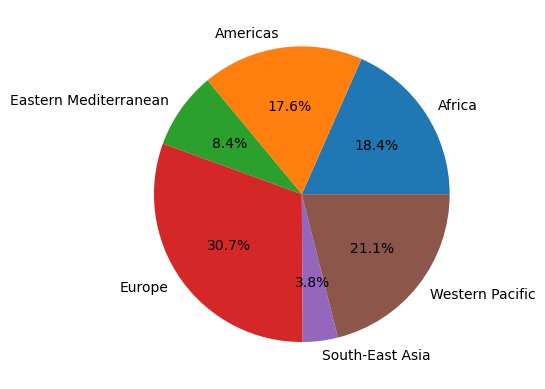

In [11]:
pp=df.groupby('WHO Region')['Deaths'].count()
plt.pie(pp,labels=pp.index,autopct='%1.1f%%')
plt.show()

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
 9   Year            49068 non-null  int64         
 10  Month           49068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 4.1+ MB


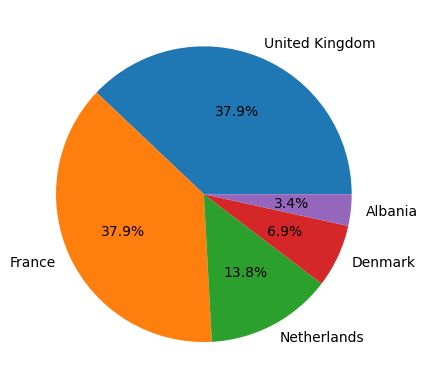

In [12]:
pp=df[df['WHO Region']=='Europe'].groupby('Country/Region')['Deaths'].count().sort_values(ascending=False).head(5)
plt.pie(pp,labels=pp.index,autopct='%1.1f%%')
plt.show()